The various classification models considered are:

- Logistic Regression
- Support Vector Classifier
- Decision Tree Classifier
- Random Forest Classifier
- K Nearest Neighbour Classifier
- Naive Bayes Classifier
- Linear Discriminant Analysis

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading the dataset
df = pd.read_table('dataset.txt')

In [3]:
# viewing the top 5 rows
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# Exploring the datasets
print(df.columns)

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')


In [5]:
# printing the shape of the data
df.shape

(59, 7)

In [6]:
# description of statistical features
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [8]:
print(df['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


In [9]:
print(df.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


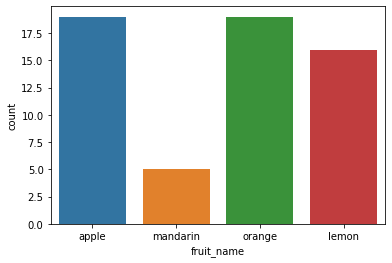

In [10]:
import seaborn as sns
sns.countplot(df['fruit_name'],label='Count')
plt.show()

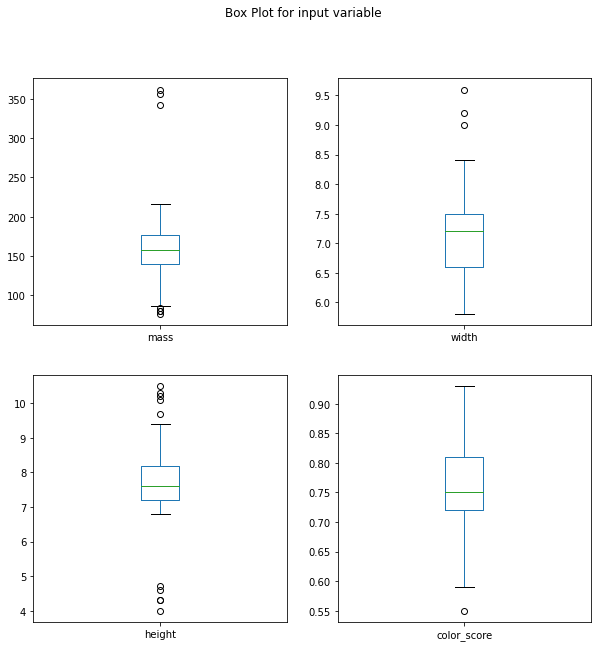

In [11]:
# distribution of numerical variables
df.drop('fruit_label' ,axis=1).plot(kind='box',subplots=True, layout=(2,2), figsize=(10,10),title='Box Plot for input variable')
plt.show()

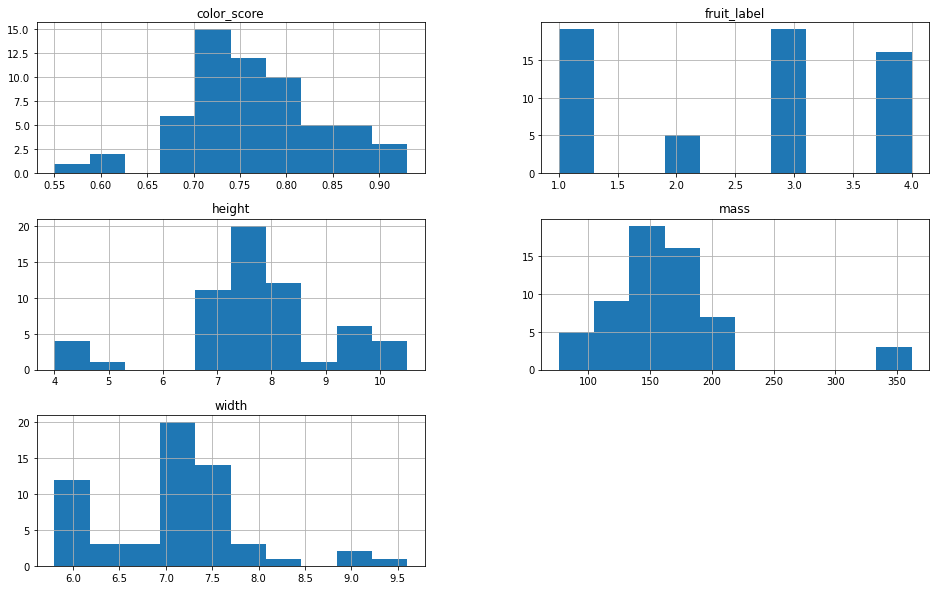

In [12]:
# plotting histogram of the data
df.hist(figsize = (16,10))
plt.show()

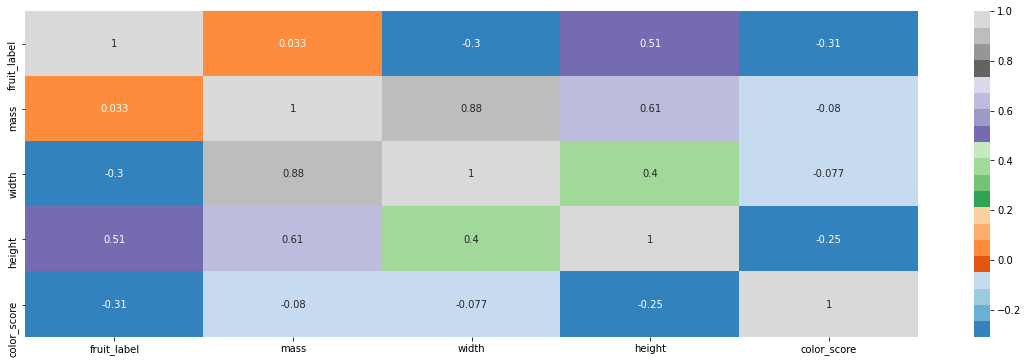

In [13]:
# correlation matrix

corr_mat = df.corr()
fig = plt.figure(figsize = (20, 6))

sns.heatmap(corr_mat, annot=True, cmap='tab20c')
plt.show()

In [14]:
X = df.drop(['fruit_label', 'fruit_name', 'fruit_subtype'],axis=1)
y = df['fruit_label']

### TrainTest Split


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)



In [16]:
print("The split of the data is as follows")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

The split of the data is as follows
X_train:  44
X_test:  15
y_train:  44
y_test:  15


### Scaling


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Building Models

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression()
# fitting the data
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [19]:
Confusion_Matrix1 = confusion_matrix(y_test, pred1)

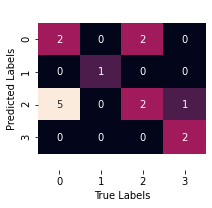

[3 1 4 4 3 1 1 4 1 1 2 3 1 1 3]
              precision    recall  f1-score   support

           1       0.29      0.50      0.36         4
           2       1.00      1.00      1.00         1
           3       0.50      0.25      0.33         8
           4       0.67      1.00      0.80         2

    accuracy                           0.47        15
   macro avg       0.61      0.69      0.62        15
weighted avg       0.50      0.47      0.45        15

Accuracy of Logistic Regression Classifier on training set:0.82
Accuracy of Logistic Regression Classifier on testing set:0.47


In [20]:
def Plot_Confusion_Matrix(Confusion_Matrix) :
    '''
    
    Plot Confusion Matrix using Seaborn's Heatmap
    
    Parameter
    ---------
    
    Confusion Matrix.
    
    '''
    
    Fig, Axes = plt.subplots(figsize=(3,3))
    Axes = sns.heatmap(Confusion_Matrix, annot=True, cbar = False)
    plt.xlabel('True Labels')
    plt.ylabel('Predicted Labels')
    
    # Fix the Broken Annotations
    
    Bottom, Top = Axes.get_ylim()
    Axes.set_ylim(Bottom + 0.5, Top - 0.5)
    plt.show()
    
Plot_Confusion_Matrix(Confusion_Matrix1)


# printing the results
print(pred1)
print(classification_report(y_test, pred1))
print('Accuracy of Logistic Regression Classifier on training set:{:.2f}'.format(lr.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classifier on testing set:{:.2f}'.format(lr.score(X_test,y_test)))

## Support Vector Machine

[3 3 4 4 1 1 1 4 3 1 2 1 3 3 3]


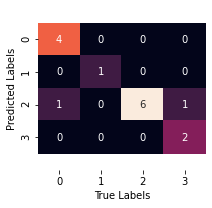

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1
           3       1.00      0.75      0.86         8
           4       0.67      1.00      0.80         2

    accuracy                           0.87        15
   macro avg       0.87      0.94      0.89        15
weighted avg       0.90      0.87      0.87        15

Accuracy of SVM Classifier on training set:1.00
Accuracy of SVM Classifier on testing set:0.87


In [21]:
from sklearn.svm import SVC

svm = SVC()
# fitting the data
svm.fit(X_train, y_train)
pred2 = svm.predict(X_test)

# printing the results
print(pred2)
Confusion_Matrix2 = confusion_matrix(y_test, pred2)
Plot_Confusion_Matrix(Confusion_Matrix2)
print(classification_report(y_test, pred2))

print('Accuracy of SVM Classifier on training set:{:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM Classifier on testing set:{:.2f}'.format(svm.score(X_test,y_test)))

## Decision Tree Classifier


[3 3 4 1 1 1 1 4 3 1 2 1 3 3 3]


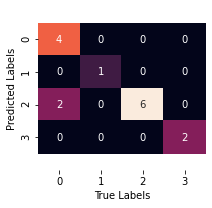

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.75      0.86         8
           4       1.00      1.00      1.00         2

    accuracy                           0.87        15
   macro avg       0.92      0.94      0.91        15
weighted avg       0.91      0.87      0.87        15

Accuracy of Decision Tree Classifier on training set:1.00
Accuracy of Decision Tree Classifier on testing set:0.87


In [22]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
# fitting the model
clf.fit(X_train, y_train)
pred3 = clf.predict(X_test)

# printing the results
print(pred3)
confusion_matrix3 = confusion_matrix(y_test, pred3)

Plot_Confusion_Matrix(confusion_matrix3)
print(classification_report(y_test, pred3))

print('Accuracy of Decision Tree Classifier on training set:{:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on testing set:{:.2f}'.format(clf.score(X_test,y_test)))

## Random Forest Classifier

[3 3 4 4 1 1 3 4 3 1 2 1 3 3 1]


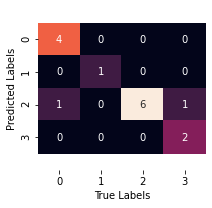

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1
           3       1.00      0.75      0.86         8
           4       0.67      1.00      0.80         2

    accuracy                           0.87        15
   macro avg       0.87      0.94      0.89        15
weighted avg       0.90      0.87      0.87        15

Accuracy of Random Forest Classifier on training set:1.00
Accuracy of Random Forest Classifier on testing set:0.87


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# fitting the data
rf.fit(X_train, y_train)
pred4 = rf.predict(X_test)

# printing the results
print(pred4)
confusion_matrix4 = confusion_matrix(y_test, pred4)

Plot_Confusion_Matrix(confusion_matrix4)
print(classification_report(y_test, pred4))
print('Accuracy of Random Forest Classifier on training set:{:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on testing set:{:.2f}'.format(rf.score(X_test,y_test)))

## Naive Bayes Classifier

[3 1 4 4 1 1 1 4 1 1 2 1 1 3 3]


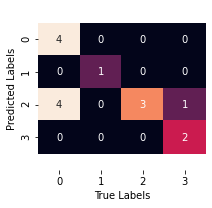

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         4
           2       1.00      1.00      1.00         1
           3       1.00      0.38      0.55         8
           4       0.67      1.00      0.80         2

    accuracy                           0.67        15
   macro avg       0.79      0.84      0.75        15
weighted avg       0.82      0.67      0.64        15

Accuracy of Naive Bayes Classifier on training set:0.86
Accuracy of Naive Bayes Classifier on testing set:0.67


In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# fitting the data
gnb.fit(X_train, y_train)
pred5 = gnb.predict(X_test)

# printing the results
print(pred5)
Confusion_Matrix5 = confusion_matrix(y_test, pred5)

Plot_Confusion_Matrix(Confusion_Matrix5)
print(classification_report(y_test, pred5))
print('Accuracy of Naive Bayes Classifier on training set:{:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of Naive Bayes Classifier on testing set:{:.2f}'.format(gnb.score(X_test,y_test)))

## K-Nearest Neighbors

[3 3 4 3 1 1 3 4 3 1 2 1 3 3 1]


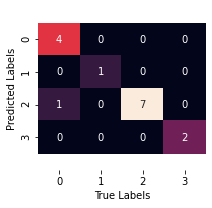

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       1.00      1.00      1.00         1
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         2

    accuracy                           0.93        15
   macro avg       0.95      0.97      0.96        15
weighted avg       0.95      0.93      0.93        15

Accuracy of K-NN Classifier on training set:0.95
Accuracy of K-NN Classifier on testing set:0.93


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# fitting the data
knn.fit(X_train, y_train)
pred6 = knn.predict(X_test)

# printing the results
print(pred6)
Confusion_Matrix6 = confusion_matrix(y_test, pred6)

Plot_Confusion_Matrix(Confusion_Matrix6)
print(classification_report(y_test, pred6))
print('Accuracy of K-NN Classifier on training set:{:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN Classifier on testing set:{:.2f}'.format(knn.score(X_test,y_test)))

## Linear Discriminant Analysis

[3 3 4 3 3 3 1 4 3 1 2 3 3 1 3]


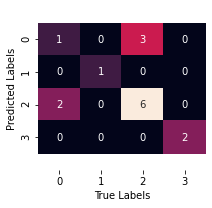

              precision    recall  f1-score   support

           1       0.33      0.25      0.29         4
           2       1.00      1.00      1.00         1
           3       0.67      0.75      0.71         8
           4       1.00      1.00      1.00         2

    accuracy                           0.67        15
   macro avg       0.75      0.75      0.75        15
weighted avg       0.64      0.67      0.65        15

Accuracy of LDA Classifier on training set:0.86
Accuracy of LDA Classifier on testing set:0.67


In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
# fitting the data
lda.fit(X_train,y_train)
pred7 = lda.predict(X_test)

# printing the results
print(pred7)
Confusion_Matrix7 = confusion_matrix(y_test, pred7)

Plot_Confusion_Matrix(Confusion_Matrix7)
print(classification_report(y_test, pred7))
print('Accuracy of LDA Classifier on training set:{:.2f}'.format(lda.score(X_train, y_train)))
print('Accuracy of LDA Classifier on testing set:{:.2f}'.format(lda.score(X_test,y_test)))


Precision : Positive Predicted Value

Recall : True Positive Rate

F1 Score : Combination of Precision and Recall (Average)

Support : Number of Samples Each Metric is Calculated on.

Accuracy : Accuracy of Model, Perfect Accuracy is 1.0 or 100%

Macro Average : Average between Classes of Labels (0 and 1), Classes must be Balanced (Almost Equal Number of 0's and 1's )